# Covid19 en Bs. As.

> Aplicamos el metodo de [babino2020masks](https://github.com/ababino/babino2020masks) a datos de la ciudad de buenos aires

## Install

`pip install babino2020masks`

## Import

In [ ]:
import pandas as pd
from fastcore.all import *
from babino2020masks.core import *
from babino2020masks.lasso import *
from covid19bsas.core import *

## Get the Data

In [ ]:
df = get_bsas_data()

## Plot

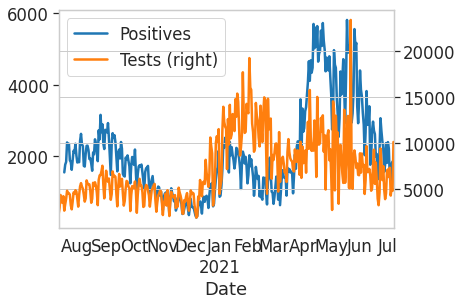

In [ ]:
df.plot(x='Date', y=['Positives', 'Tests'], secondary_y=['Tests']);

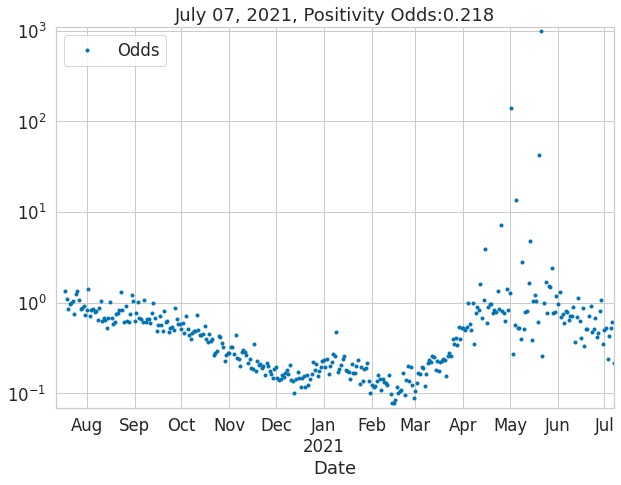

In [ ]:
ax = plot_data_and_fit(df, 'Date', 'Odds', None, None, None, figsize=(10, 7))
ax.set_title(f'{df.tail(1).Date[0]:%B %d, %Y}, Positivity Odds:{df.tail(1).Odds.values[0]:2.3}');

In [ ]:
sdf = df.dropna().copy()
lics = LassoICSelector(sdf['Odds'], 'bic')
lics.fit_best_alpha()

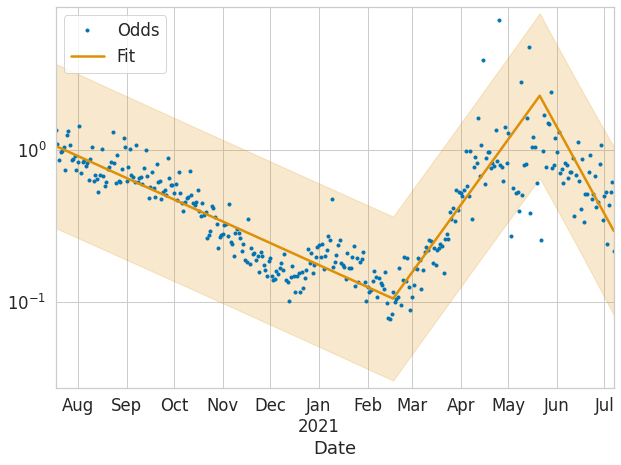

In [ ]:
sdf['Fit'], sdf['Odds_l'], sdf['Odds_u'] = lics.odds_hat_l_u()
ax = plot_data_and_fit(sdf, 'Date', 'Odds', 'Fit', 'Odds_l', 'Odds_u', figsize=(10, 7))

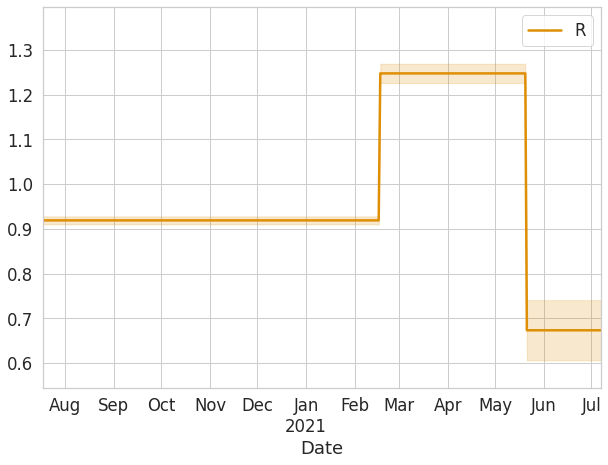

In [ ]:
sdf['R'], sdf['Rl'], sdf['Ru'] = lics.rt()
ax = plot_data_and_fit(sdf, 'Date', None, 'R', 'Rl', 'Ru', figsize=(10, 7), logy=False, palette=[colorblind[1],colorblind[1]])